Stock price forecasting using historical market data.

Predict stock prices using Linear Regression by training on the past days of prices. The code scales the data, makes predictions, and visualizes actual vs predicted prices.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

In [7]:
np.random.seed(42)
dates = pd.date_range("2020-01-01", periods=2000)
prices = 100 + np.cumsum(np.random.normal(0,1,len(dates)))

In [8]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(prices.reshape(-1,1))

In [9]:
X, y = [], []
for i in range(60, len(scaled)):
    X.append(scaled[i-60:i,0])
    y.append(scaled[i,0])
X, y = np.array(X), np.array(y)

In [10]:
split = int(len(X)*0.8)
model = LinearRegression().fit(X[:split], y[:split])
pred = model.predict(X[split:])
pred_prices = scaler.inverse_transform(pred.reshape(-1,1))

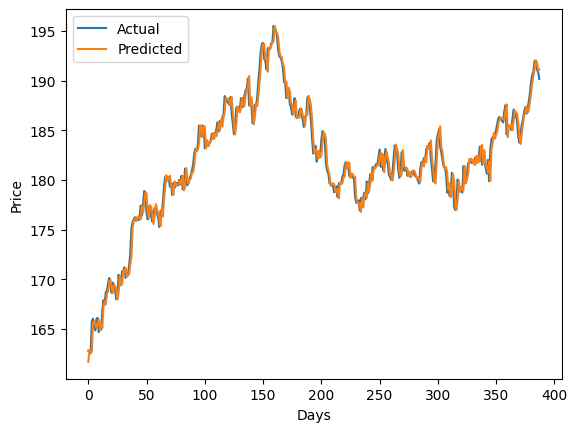

In [11]:
plt.plot(prices[split+60:], label="Actual")
plt.plot(pred_prices, label="Predicted")
plt.xlabel("Days"); plt.ylabel("Price"); plt.legend(); plt.show()